In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly
import plotly.figure_factory as ff
import seaborn as sns
import random
import warnings
import dabl

In [152]:
data = pd.read_csv("players.csv")
data.head()

sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0     158023           L. Messi   32  24-06-1987        170         72   
1      20801  Cristiano Ronaldo   34  05-02-1985        187         83   
2     190871          Neymar Jr   27  05-02-1992        175         68   
3     200389           J. Oblak   26  07-01-1993        188         87   
4     183277          E. Hazard   28  07-01-1991        175         74   

  nationality                 club  overall  potential  ...  passing  \
0   Argentina         FC Barcelona       94         94  ...     92.0   
1    Portugal             Juventus       93         93  ...     82.0   
2      Brazil  Paris Saint-Germain       92         92  ...     87.0   
3    Slovenia      Atlético Madrid       91         93  ...      NaN   
4     Belgium          Real Madrid       91         91  ...     86.0   

   dribbling defending physic  gk_diving  gk_handling  gk_kicking gk_reflexes  \
0       96.0      39.0   66.0        NaN          NaN         NaN         NaN   
1       89.0      35.0   78.0        NaN          NaN         NaN         NaN   
2       95.0      32.0   58.0        NaN          NaN         NaN         NaN   
3        NaN       NaN    NaN       87.0         92.0        78.0        89.0   
4       94.0      35.0   66.0        NaN          NaN         NaN         NaN   

   gk_speed gk_positioning  
0       NaN            NaN  
1       NaN            NaN  
2       NaN            NaN  
3      52.0           90.0  
4       NaN            NaN  

[5 rows x 32 columns]

In [18]:
data.shape

(18278, 32)

In [20]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...       passing     dribbling     defending  \
count  18278.000000  ...  16242.000000  16242.000000  16242.000000   
mean       2.944250  ...     57.233777     62.531585     51.553503   
std        0.664656  ...     10.407844     10.284950     16.419528   
min        1.000000  ...     24.000000     23.000000     15.000000   
25%        3.000000  ...     50.000000     57.000000     36.000000   
50%        3.000000  ...     58.000000     64.000000     56.000000   
75%        3.000000  ...     64.000000     69.000000     65.000000   
max        5.000000  ...     92.000000     96.000000     90.000000   

             physic    gk_diving  gk_handling   gk_kicking  gk_reflexes  \
count  16242.000000  2036.000000  2036.000000  2036.000000  2036.000000   
mean      64.876678    65.422397    63.146365    61.832515    66.390472   
std        9.760162     7.736278     7.244023     7.510709     8.154062   
min       27.000000    44.000000    42.000000    35.000000    45.000000   
25%       59.000000    60.000000    58.000000    57.000000    60.750000   
50%       66.000000    65.000000    63.000000    61.000000    66.000000   
75%       72.000000    70.000000    68.000000    66.000000    72.000000   
max       90.000000    90.000000    92.000000    93.000000    92.000000   

          gk_speed  gk_positioning  
count  2036.000000     2036.000000  
mean     37.798625       63.374754  
std      10.634038        8.447876  
min      12.000000       41.000000  
25%      29.000000       58.000000  
50%      39.000000       64.000000  
75%      46.000000       69.000000  
max      65.000000       91.000000  

[8 rows x 24 columns]

In [21]:
#Correlation Analysis
data.corr()

sofifa_id       age  height_cm  weight_kg   overall  \
sofifa_id                  1.000000 -0.736680  -0.093464  -0.203620 -0.445061   
age                       -0.736680  1.000000   0.081391   0.237169  0.464305   
height_cm                 -0.093464  0.081391   1.000000   0.768816  0.039945   
weight_kg                 -0.203620  0.237169   0.768816   1.000000  0.156522   
overall                   -0.445061  0.464305   0.039945   0.156522  1.000000   
potential                  0.042015 -0.262872  -0.002432  -0.011738  0.646650   
value_eur                 -0.159848  0.081513   0.009527   0.051782  0.638230   
wage_eur                  -0.228084  0.151031   0.019547   0.065946  0.573578   
international_reputation  -0.360765  0.259582   0.037935   0.090854  0.475557   
weak_foot                 -0.092250  0.073988  -0.175200  -0.128568  0.230276   
skill_moves               -0.079645  0.045277  -0.429980  -0.352060  0.401261   
release_clause_eur        -0.143372  0.065748   0.010941   0.048097  0.631286   
pace                       0.162112 -0.201211  -0.432158  -0.387138  0.158866   
shooting                  -0.274248  0.238990  -0.203716  -0.095442  0.497881   
passing                   -0.367527  0.330507  -0.290623  -0.182688  0.683954   
dribbling                 -0.222207  0.161913  -0.413370  -0.300792  0.601190   
defending                 -0.225230  0.259990   0.216422   0.218564  0.334792   
physic                    -0.370582  0.435292   0.490354   0.581971  0.517214   
gk_diving                 -0.395903  0.429622   0.142825   0.254839  0.948912   
gk_handling               -0.414772  0.466477   0.152043   0.269460  0.925025   
gk_kicking                -0.350622  0.404785   0.081560   0.213008  0.790903   
gk_reflexes               -0.378179  0.418794   0.134570   0.244762  0.947823   
gk_speed                  -0.346197  0.338096  -0.018340   0.078373  0.480652   
gk_positioning            -0.478916  0.550246   0.151743   0.287172  0.944758   

                          potential  value_eur  wage_eur  \
sofifa_id                  0.042015  -0.159848 -0.228084   
age                       -0.262872   0.081513  0.151031   
height_cm                 -0.002432   0.009527  0.019547   
weight_kg                 -0.011738   0.051782  0.065946   
overall                    0.646650   0.638230  0.573578   
potential                  1.000000   0.580868  0.475490   
value_eur                  0.580868   1.000000  0.858052   
wage_eur                   0.475490   0.858052  1.000000   
international_reputation   0.341221   0.618133  0.652061   
weak_foot                  0.171354   0.169084  0.149405   
skill_moves                0.328440   0.303694  0.263147   
release_clause_eur         0.595383   0.993735  0.853809   
pace                       0.229060   0.171373  0.113545   
shooting                   0.304000   0.343938  0.301760   
passing                    0.424816   0.448258  0.403862   
dribbling                  0.451097   0.427721  0.371029   
defending                  0.151608   0.157928  0.165624   
physic                     0.148449   0.236395  0.223157   
gk_diving                  0.702637   0.554703  0.524273   
gk_handling                0.667461   0.556627  0.530302   
gk_kicking                 0.557182   0.469215  0.445445   
gk_reflexes                0.704252   0.553747  0.520548   
gk_speed                   0.238038   0.261993  0.265191   
gk_positioning             0.622746   0.517965  0.501137   

                          international_reputation  weak_foot  ...   passing  \
sofifa_id                                -0.360765  -0.092250  ... -0.367527   
age                                       0.259582   0.073988  ...  0.330507   
height_cm                                 0.037935  -0.175200  ... -0.290623   
weight_kg                                 0.090854  -0.128568  ... -0.182688   
overall                                   0.475557   0.230276  ...  0.683954   
potential          

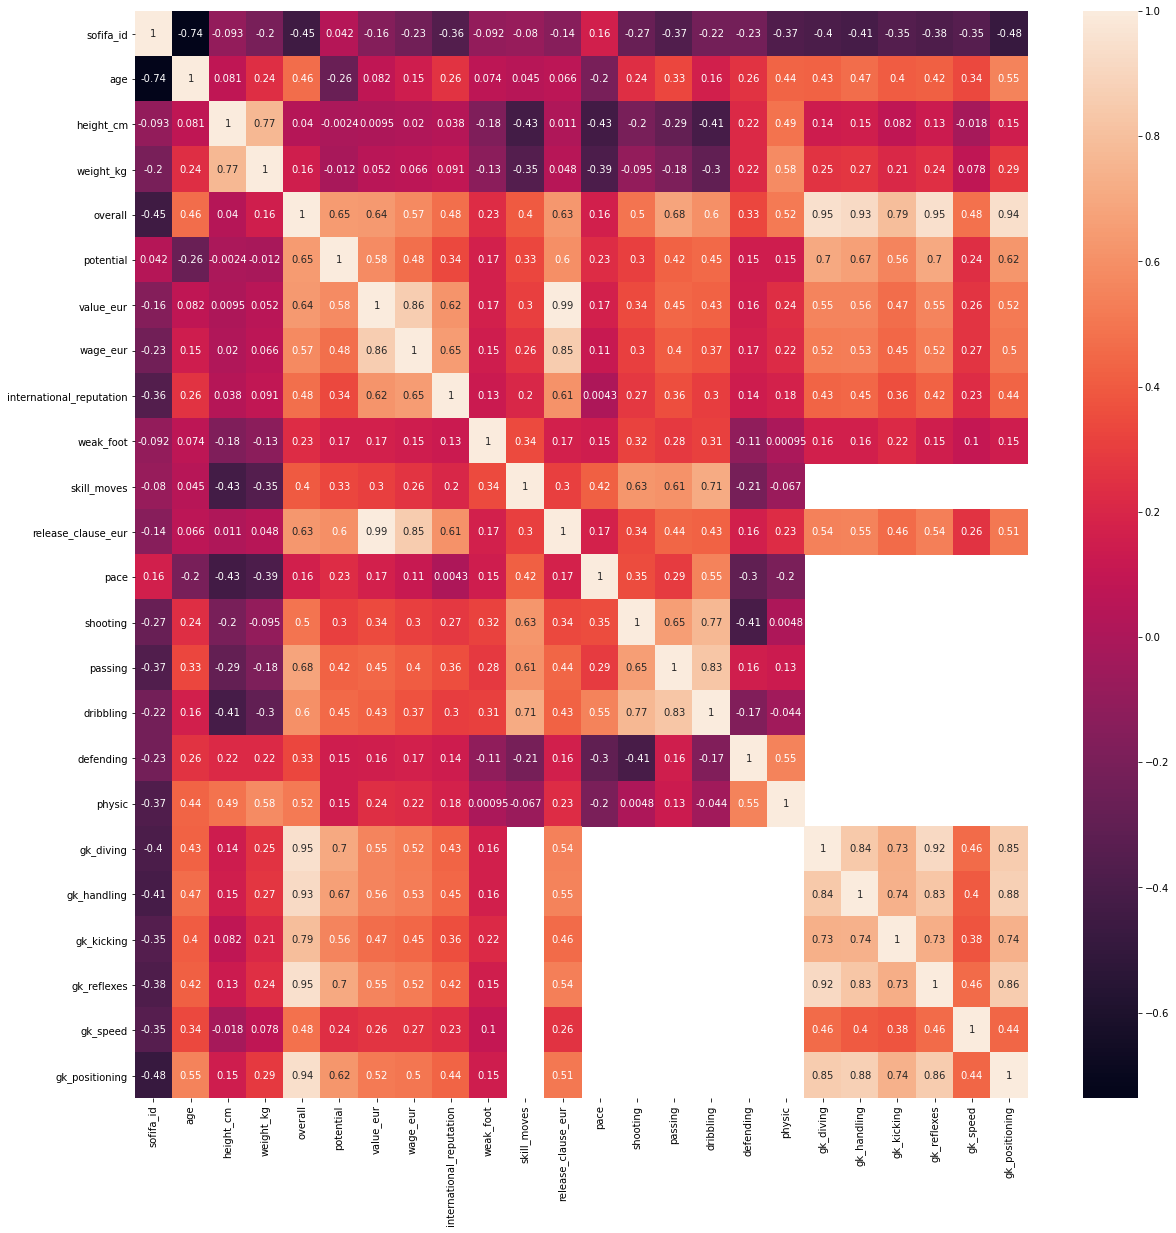

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True);

In [153]:
#data cleaning
data.drop("sofifa_id",axis=1,inplace=True)
data=data.sample(frac=1)
data

short_name  age         dob  height_cm  weight_kg    nationality  \
7372      A. Pomini   38  17-03-1981        185         80          Italy   
11679  O. Söderberg   28  20-07-1990        194         94         Sweden   
5643     C. Ramirez   28  04-04-1991        188         85  United States   
936      M. Antonio   29  28-03-1990        178         82        England   
13989  S. Kulenović   19  04-12-1999        188         76        Croatia   
...             ...  ...         ...        ...        ...            ...   
6655    B. Brereton   20  18-04-1999        185         75        England   
11523    S. Vecchia   24  23-01-1995        183         80         Sweden   
10018    Pedro Díaz   21  05-06-1998        180         75          Spain   
16718  F. Ranocchia   18  14-05-2001        184         76          Italy   
17324   R. Fleurier   22  17-03-1997        176         70         France   

                         club  overall  potential  value_eur  ...  passing  \
7372               Venezia FC       68         68      90000  ...      NaN   
11679          AFC Eskilstuna       64         66     400000  ...      NaN   
5643           Houston Dynamo       70         70    1800000  ...     50.0   
936           West Ham United       78         78   10000000  ...     73.0   
13989          Legia Warszawa       61         79     550000  ...     41.0   
...                       ...      ...        ...        ...  ...      ...   
6655         Blackburn Rovers       68         81    1700000  ...     58.0   
11523               IK Sirius       64         69     600000  ...     59.0   
10018  Real Sporting de Gijón       65         76     925000  ...     66.0   
16718                 Perugia       56         79     200000  ...     53.0   
17324         FC Chambly Oise       55         61     100000  ...     43.0   

      dribbling defending  physic  gk_diving  gk_handling gk_kicking  \
7372        NaN       NaN     NaN       65.0         66.0       62.0   
11679       NaN       NaN     NaN       64.0         63.0       63.0   
5643       68.0      30.0    74.0        NaN          NaN        NaN   
936        78.0      56.0    82.0        NaN          NaN        NaN   
13989      60.0      21.0    59.0        NaN          NaN        NaN   
...         ...       ...     ...        ...          ...        ...   
6655       69.0      42.0    67.0        NaN          NaN        NaN   
11523      67.0      35.0    63.0        NaN          NaN        NaN   
10018      67.0      37.0    54.0        NaN          NaN        NaN   
16718      59.0      53.0    58.0        NaN          NaN        NaN   
17324      50.0      53.0    51.0        NaN          NaN        NaN   

       gk_reflexes gk_speed  gk_positioning  
7372          69.0     41.0            71.0  
11679         64.0     30.0            64.0  
5643           NaN      NaN             NaN  
936            NaN      NaN             NaN  
13989          NaN      NaN             NaN  
...            ...      ...             ...  
6655           NaN      NaN             NaN  
11523          NaN      NaN             NaN  
10018          NaN      NaN             NaN  
16718          NaN      NaN             NaN  
17324          NaN      NaN             NaN  

[18278 rows x 31 columns]

In [127]:
data.isna().sum()

short_name                      0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
real_face                       0
release_clause_eur           1298
team_position                   0
pace                         2036
shooting                     2036
passing                      2036
dribbling                    2036
defending                    2036
physic                       2036
gk_diving                   16242
gk_handling                 16242
gk_kicking                  16242
gk_reflexes                 16242
gk_speed      

In [128]:
data["team_position"].fillna("Unknown",inplace=True)
data.isna().sum()

short_name                      0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
real_face                       0
release_clause_eur           1298
team_position                   0
pace                         2036
shooting                     2036
passing                      2036
dribbling                    2036
defending                    2036
physic                       2036
gk_diving                   16242
gk_handling                 16242
gk_kicking                  16242
gk_reflexes                 16242
gk_speed      

In [129]:
data.fillna(0,inplace=True)
data.isna().sum()

short_name                  0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
real_face                   0
release_clause_eur          0
team_position               0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
gk_diving                   0
gk_handling                 0
gk_kicking                  0
gk_reflexes                 0
gk_speed                    0
gk_positioning              0
predict                     0
dtype: int64

In [34]:
data

short_name  age         dob  height_cm  weight_kg  nationality  \
10431      M. De Iriondo   26  06-05-1993        179         75    Argentina   
5434             A. Baby   30  23-02-1989        183         80      Senegal   
9723         M. de Leeuw   32  07-10-1986        178         67  Netherlands   
6613       Y. Opanasenko   28  25-08-1990        180         74      Ukraine   
213            E. Banega   31  29-06-1988        174         71    Argentina   
...                  ...  ...         ...        ...        ...          ...   
8111        P. Parzyszek   25  08-09-1993        190         80       Poland   
5139           M. Saymak   26  11-02-1993        169         63  Netherlands   
4999            T. Valls   23  18-12-1995        180         75       France   
5849   C. Oliveira Souza   23  15-09-1995        172         68       Brazil   
38         P. Aubameyang   30  18-06-1989        187         80        Gabon   

                    club  overall  potential  value_eur  ...  passing  \
10431  Unión de Santa Fe       65         69     625000  ...     55.0   
5434    Royal Antwerp FC       70         70    1700000  ...     63.0   
9723            FC Emmen       66         66     500000  ...     59.0   
6613    Atiker Konyaspor       69         69     900000  ...     64.0   
213           Sevilla FC       83         83   19500000  ...     84.0   
...                  ...      ...        ...        ...  ...      ...   
8111       Piast Gliwice       67         71    1000000  ...     53.0   
5139     Çaykur Rizespor       70         72    2100000  ...     65.0   
4999     Nîmes Olympique       70         75    2300000  ...     66.0   
5849     SC Paderborn 07       69         76    1500000  ...     61.0   
38               Arsenal       88         88   57000000  ...     75.0   

      dribbling defending  physic  gk_diving  gk_handling gk_kicking  \
10431      61.0      64.0    79.0        0.0          0.0        0.0   
5434       69.0      55.0    75.0        0.0          0.0        0.0   
9723       67.0      57.0    69.0        0.0          0.0        0.0   
6613       67.0      68.0    68.0        0.0          0.0        0.0   
213        82.0      77.0    70.0        0.0          0.0        0.0   
...         ...       ...     ...        ...          ...        ...   
8111       62.0      39.0    73.0        0.0          0.0        0.0   
5139       72.0      46.0    54.0        0.0          0.0        0.0   
4999       68.0      65.0    65.0        0.0          0.0        0.0   
5849       75.0      46.0    57.0        0.0          0.0        0.0   
38         80.0      37.0    69.0        0.0          0.0        0.0   

       gk_reflexes gk_speed  gk_positioning  
10431          0.0      0.0             0.0  
5434           0.0      0.0             0.0  
9723           0.0      0.0             0.0  
6613           0.0      0.0             0.0  
213            0.0      0.0             0.0  
...            ...      ...             ...  
8111           0.0      0.0             0.0  
5139           0.0      0.0             0.0  
4999           0.0      0.0             0.0  
5849           0.0      0.0             0.0  
38             0.0      0.0             0.0  

[18278 rows x 31 columns]

In [38]:
data.nationality.value_counts()

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
             ... 
Mauritius       1
Macau           1
Ethiopia        1
Gibraltar       1
Belize          1
Name: nationality, Length: 162, dtype: int64

In [50]:
fig = ex.pie(data,names='preferred_foot')
fig.update_layout(title='<b>Proportion Of foot<b>')
fig.show()

In [45]:
fig = ex.pie(data,names='international_reputation')
fig.update_layout(title='<b>International Reputation Of Team<b>')
fig.show()

In [46]:
fig = ex.pie(data,names='team_position')
fig.update_layout(title='<b>Team Position<b>')
fig.show()

c:\python38\lib\site-packages\dabl\plot\supervised.py:545: FutureWarning:

The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.



Target looks like regression


c:\python38\lib\site-packages\dabl\plot\utils.py:632: UserWarning:

Dropped 76 outliers in column value_eur.

c:\python38\lib\site-packages\dabl\plot\utils.py:632: UserWarning:

Dropped 78 outliers in column release_clause_eur.

c:\python38\lib\site-packages\dabl\plot\utils.py:632: UserWarning:

Dropped 1 outliers in column weight_kg.



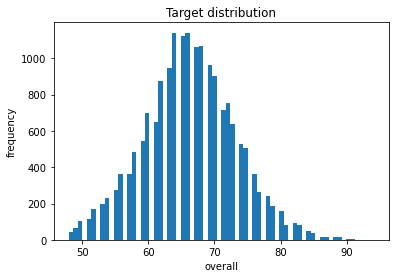

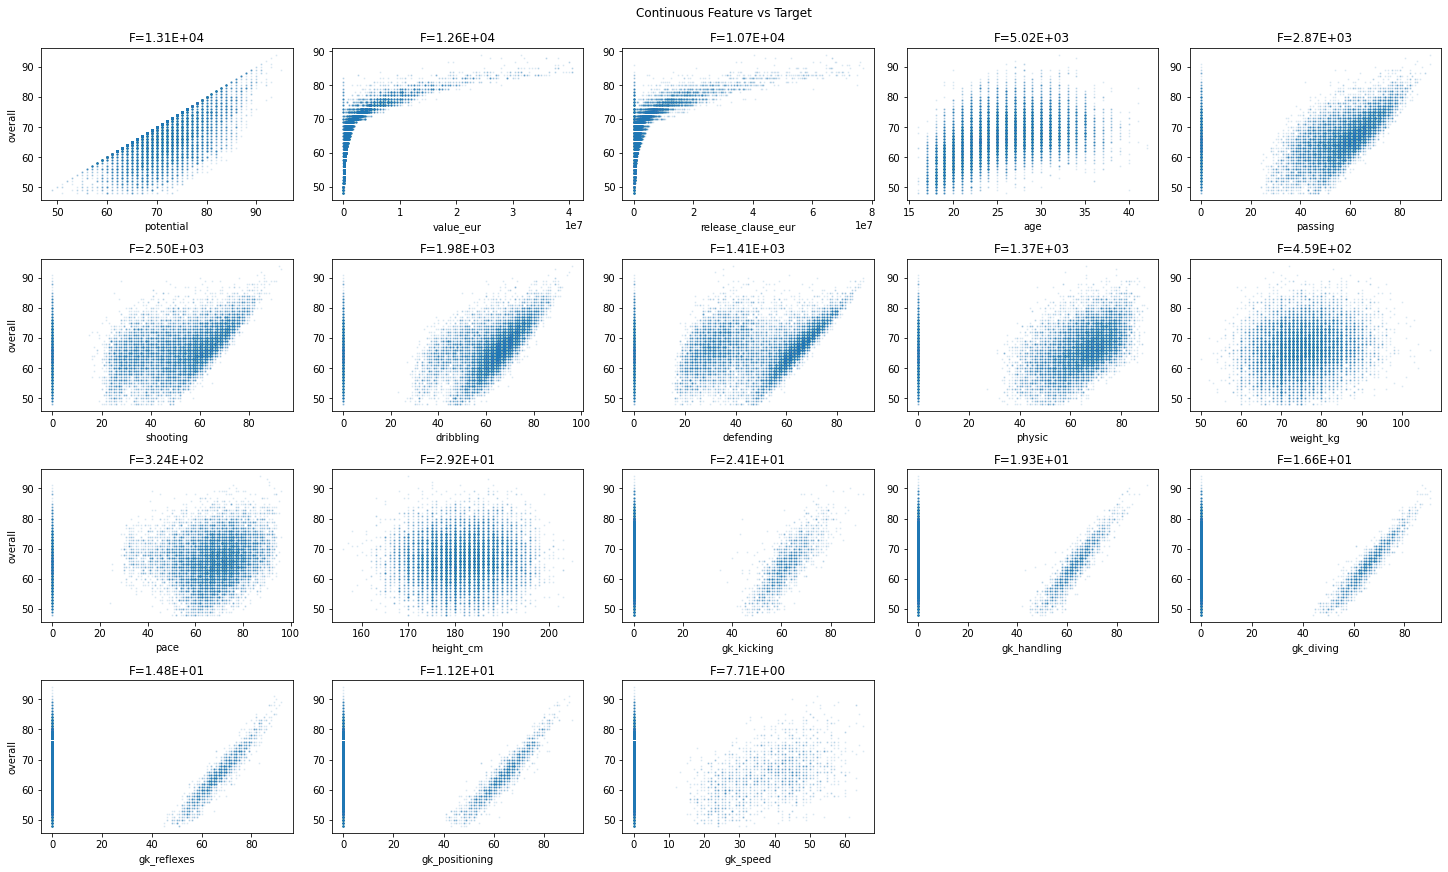

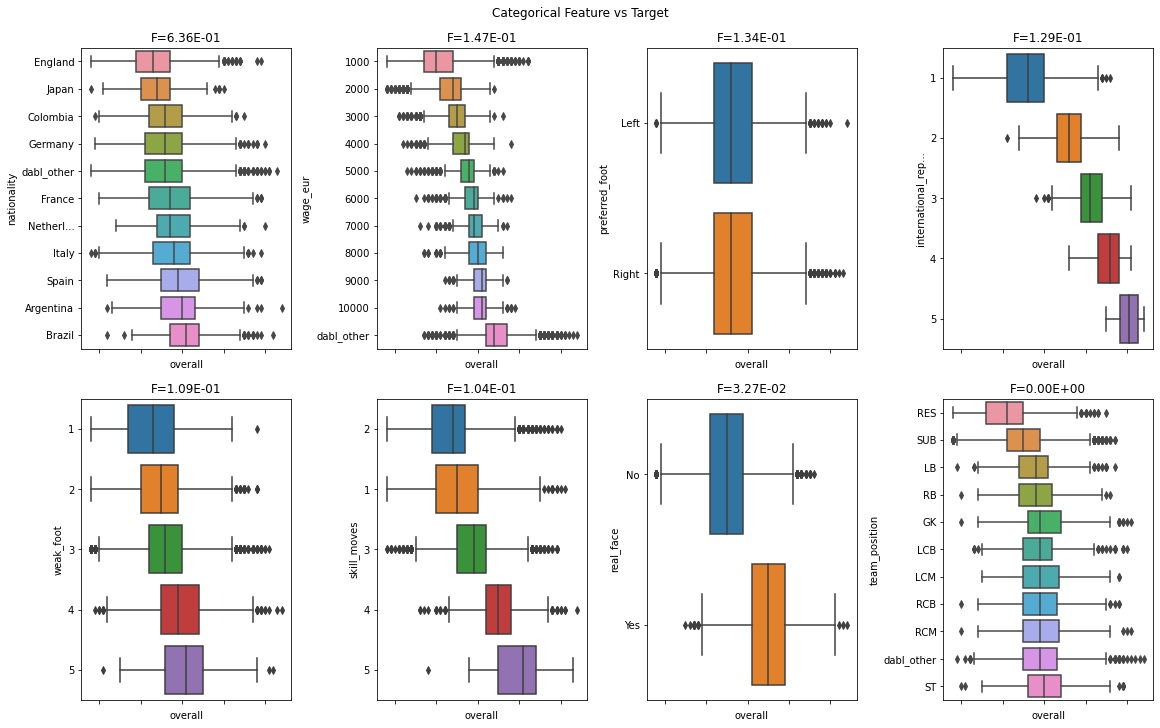

In [49]:
dabl.plot(data, y='overall')

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



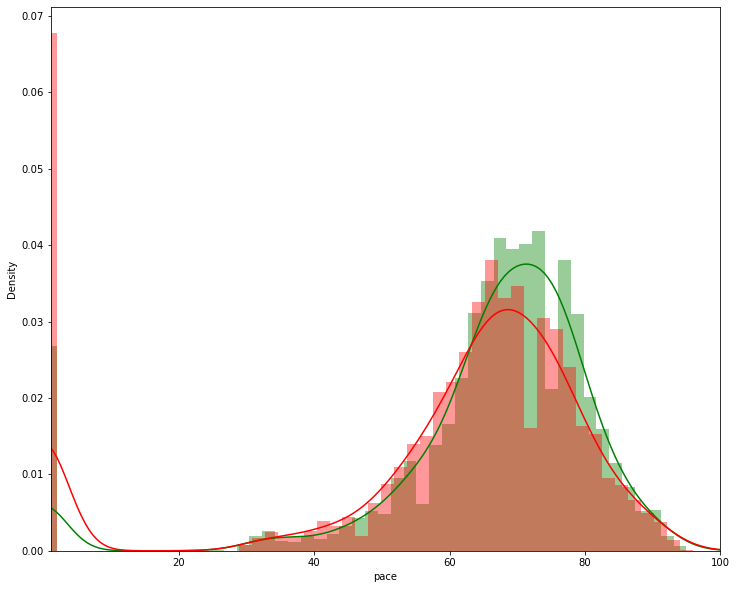

In [60]:
#Relation between footed and pace
plt.figure(figsize=(12,10))
sns.distplot(data[data['preferred_foot'] == "Left"]["pace"], color='green') 
sns.distplot(data[data['preferred_foot'] == "Right"]["pace"], color='red') 
plt.xlim([1,100])
plt.show()

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



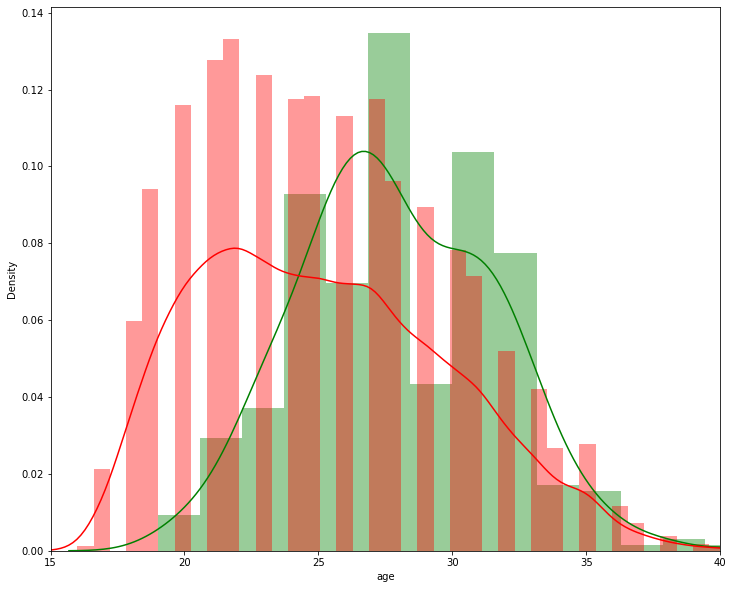

In [64]:
#distribution of age
plt.figure(figsize=(12,10))
sns.distplot(data[data['overall'] >80]["age"], color='green') 
sns.distplot(data[data['overall'] < 80]["age"], color='red') 
plt.xlim([15,40])
plt.show()

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



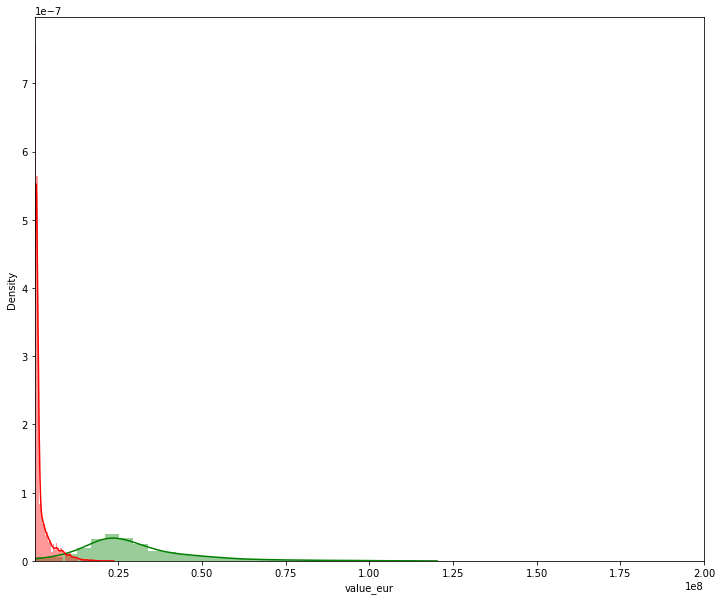

In [72]:
#distribution of value
plt.figure(figsize=(12,10))
sns.distplot(data[data['overall'] >80]["value_eur"], color='green') 
sns.distplot(data[data['overall'] < 80]["value_eur"], color='red') 
plt.xlim([1,200000000])
plt.show()

In [118]:
data['preferred_foot'] = data['preferred_foot'].replace(['Left'],0)
data['preferred_foot'] = data['preferred_foot'].replace(['Right'],1)
data

sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0         158023           L. Messi   32  24-06-1987        170         72   
1          20801  Cristiano Ronaldo   34  05-02-1985        187         83   
2         190871          Neymar Jr   27  05-02-1992        175         68   
3         200389           J. Oblak   26  07-01-1993        188         87   
4         183277          E. Hazard   28  07-01-1991        175         74   
...          ...                ...  ...         ...        ...        ...   
18273     245006         Shao Shuai   22  10-03-1997        186         79   
18274     250995       Xiao Mingjie   22  01-01-1997        177         66   
18275     252332          Zhang Wei   19  16-05-2000        186         75   
18276     251110       Wang Haijian   18  02-08-2000        185         74   
18277     233449         Pan Ximing   26  11-01-1993        182         78   

      nationality                           club  overall  potential  ...  \
0       Argentina                   FC Barcelona       94         94  ...   
1        Portugal                       Juventus       93         93  ...   
2          Brazil            Paris Saint-Germain       92         92  ...   
3        Slovenia                Atlético Madrid       91         93  ...   
4         Belgium                    Real Madrid       91         91  ...   
...           ...                            ...      ...        ...  ...   
18273    China PR               Beijing Renhe FC       48         56  ...   
18274    China PR               Shanghai SIPG FC       48         56  ...   
18275    China PR         Hebei China Fortune FC       48         56  ...   
18276    China PR  Shanghai Greenland Shenhua FC       48         54  ...   
18277    China PR         Hebei China Fortune FC       48         51  ...   

       dribbling  defending physic  gk_diving  gk_handling  gk_kicking  \
0           96.0       39.0   66.0        NaN          NaN         NaN   
1           89.0       35.0   78.0        NaN          NaN         NaN   
2           95.0       32.0   58.0        NaN          NaN         NaN   
3            NaN        NaN    NaN       87.0         92.0        78.0   
4           94.0       35.0   66.0        NaN          NaN         NaN   
...          ...        ...    ...        ...          ...         ...   
18273       33.0       47.0   51.0        NaN          NaN         NaN   
18274       35.0       48.0   48.0        NaN          NaN         NaN   
18275       45.0       48.0   51.0        NaN          NaN         NaN   
18276       47.0       45.0   52.0        NaN          NaN         NaN   
18277       45.0       47.0   55.0        NaN          NaN         NaN   

       gk_reflexes gk_speed  gk_positioning predict  
0              NaN      NaN             NaN     1.0  
1              NaN      NaN             NaN     1.0  
2              NaN      NaN             NaN     1.0  
3             89.0     52.0            90.0     1.0  
4              NaN      NaN             NaN     1.0  
...            ...      ...             ...     ...  
18273          NaN      NaN             NaN     0.0  
18274          NaN      NaN             NaN     0.0  
18275          NaN      NaN             NaN     0.0  
18276          NaN      NaN             NaN     0.0  
18277          NaN      NaN             NaN     0.0  

[18278 rows x 33 columns]

In [77]:
fig = ff.create_2d_density(
    x=data['pace'],
    y=data['preferred_foot'],
    title="Pace and preferred foot plot",
    colorscale=['#7A4579', '#D52033', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)

fig.show()

In [79]:
import plotly.express as px 
from bokeh.plotting import figure, show

In [80]:
#age and pace and overall
fig = px.scatter_3d(data, x="pace", y="age", z= "overall", color="preferred_foot",
                     size_max=6, width=1000, height=1000)
fig.show()

In [82]:
#age, pace ,wage , height
import plotly.graph_objects as go
from plotly.subplots import make_subplots


Figure = make_subplots(rows=2, cols=2,shared_yaxes=True,subplot_titles=("age", "pace","wage"))

Figure.add_trace(go.Histogram(x = data[data['overall'] >80]['age'], nbinsx=100),1,1)
Figure.add_trace(go.Histogram(x = data[data['overall'] <=80]['age'], nbinsx=100),1,1)
Figure.add_trace(go.Histogram(x = data[data['overall'] >80]['pace'], nbinsx=100),1,2)
Figure.add_trace(go.Histogram(x = data[data['overall'] <=80]['pace'], nbinsx=100),1,2)
Figure.add_trace(go.Histogram(x = data[data['overall'] >80]['wage_eur'], nbinsx=100),2,1)
Figure.add_trace(go.Histogram(x = data[data['overall'] <=80]['wage_eur'], nbinsx=100),2,1)
Figure.add_trace(go.Histogram(x = data[data['overall'] >80]['height_cm'], nbinsx=100),2,2)
Figure.add_trace(go.Histogram(x = data[data['overall'] <=80]['height_cm'], nbinsx=100),2,2)

In [83]:
#T-test

import scipy.stats as stats
v_yes = "foot has no effect on overall score "  
v_no = " foot has effect on overall score "   

x = data.loc[data.overall > 80, "preferred_foot"].values  
y = data.loc[data.overall <= 80, "preferred_foot"].values

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  
    print(f'{v_yes} as the p_value ({p_value}) < 0.05')
else:
    print(f'{v_no} as the p_value ({p_value}) > 0.05')

 foot has effect on overall score  as the p_value (0.3531805340958504) > 0.05


In [122]:
#Label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_features = ['nationality','club','team_position']
data[label_features] = data[label_features].apply(le.fit_transform)
data

sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0         158023           L. Messi   32  24-06-1987        170         72   
1          20801  Cristiano Ronaldo   34  05-02-1985        187         83   
2         190871          Neymar Jr   27  05-02-1992        175         68   
3         200389           J. Oblak   26  07-01-1993        188         87   
4         183277          E. Hazard   28  07-01-1991        175         74   
...          ...                ...  ...         ...        ...        ...   
18273     245006         Shao Shuai   22  10-03-1997        186         79   
18274     250995       Xiao Mingjie   22  01-01-1997        177         66   
18275     252332          Zhang Wei   19  16-05-2000        186         75   
18276     251110       Wang Haijian   18  02-08-2000        185         74   
18277     233449         Pan Ximing   26  11-01-1993        182         78   

       nationality  club  overall  potential  ...  dribbling  defending  \
0                5   224       94         94  ...       96.0       39.0   
1              121   350       93         93  ...       89.0       35.0   
2               18   462       92         92  ...       95.0       32.0   
3              133    63       91         93  ...        NaN        NaN   
4               12   505       91         91  ...       94.0       35.0   
...            ...   ...      ...        ...  ...        ...        ...   
18273           28    79       48         56  ...       33.0       47.0   
18274           28   574       48         56  ...       35.0       48.0   
18275           28   317       48         56  ...       45.0       48.0   
18276           28   573       48         54  ...       47.0       45.0   
18277           28   317       48         51  ...       45.0       47.0   

      physic  gk_diving  gk_handling  gk_kicking  gk_reflexes gk_speed  \
0       66.0        NaN          NaN         NaN          NaN      NaN   
1       78.0        NaN          NaN         NaN          NaN      NaN   
2       58.0        NaN          NaN         NaN          NaN      NaN   
3        NaN       87.0         92.0        78.0         89.0     52.0   
4       66.0        NaN          NaN         NaN          NaN      NaN   
...      ...        ...          ...         ...          ...      ...   
18273   51.0        NaN          NaN         NaN          NaN      NaN   
18274   48.0        NaN          NaN         NaN          NaN      NaN   
18275   51.0        NaN          NaN         NaN          NaN      NaN   
18276   52.0        NaN          NaN         NaN          NaN      NaN   
18277   55.0        NaN          NaN         NaN          NaN      NaN   

       gk_positioning  predict  
0                 NaN      1.0  
1                 NaN      1.0  
2                 NaN      1.0  
3                90.0      1.0  
4                 NaN      1.0  
...               ...      ...  
18273             NaN      0.0  
18274             NaN      0.0  
18275             NaN      0.0  
18276             NaN      0.0  
18277             NaN      0.0  

[18278 rows x 33 columns]

In [117]:
data.loc[data['overall'] >= 80 , 'predict'] = 1
data.loc[data['overall'] < 80 , 'predict'] = 0
data

sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0         158023           L. Messi   32  24-06-1987        170         72   
1          20801  Cristiano Ronaldo   34  05-02-1985        187         83   
2         190871          Neymar Jr   27  05-02-1992        175         68   
3         200389           J. Oblak   26  07-01-1993        188         87   
4         183277          E. Hazard   28  07-01-1991        175         74   
...          ...                ...  ...         ...        ...        ...   
18273     245006         Shao Shuai   22  10-03-1997        186         79   
18274     250995       Xiao Mingjie   22  01-01-1997        177         66   
18275     252332          Zhang Wei   19  16-05-2000        186         75   
18276     251110       Wang Haijian   18  02-08-2000        185         74   
18277     233449         Pan Ximing   26  11-01-1993        182         78   

      nationality                           club  overall  potential  ...  \
0       Argentina                   FC Barcelona       94         94  ...   
1        Portugal                       Juventus       93         93  ...   
2          Brazil            Paris Saint-Germain       92         92  ...   
3        Slovenia                Atlético Madrid       91         93  ...   
4         Belgium                    Real Madrid       91         91  ...   
...           ...                            ...      ...        ...  ...   
18273    China PR               Beijing Renhe FC       48         56  ...   
18274    China PR               Shanghai SIPG FC       48         56  ...   
18275    China PR         Hebei China Fortune FC       48         56  ...   
18276    China PR  Shanghai Greenland Shenhua FC       48         54  ...   
18277    China PR         Hebei China Fortune FC       48         51  ...   

       dribbling  defending physic gk_diving  gk_handling  gk_kicking  \
0           96.0       39.0   66.0       NaN          NaN         NaN   
1           89.0       35.0   78.0       NaN          NaN         NaN   
2           95.0       32.0   58.0       NaN          NaN         NaN   
3            NaN        NaN    NaN      87.0         92.0        78.0   
4           94.0       35.0   66.0       NaN          NaN         NaN   
...          ...        ...    ...       ...          ...         ...   
18273       33.0       47.0   51.0       NaN          NaN         NaN   
18274       35.0       48.0   48.0       NaN          NaN         NaN   
18275       45.0       48.0   51.0       NaN          NaN         NaN   
18276       47.0       45.0   52.0       NaN          NaN         NaN   
18277       45.0       47.0   55.0       NaN          NaN         NaN   

       gk_reflexes gk_speed  gk_positioning predict  
0              NaN      NaN             NaN     1.0  
1              NaN      NaN             NaN     1.0  
2              NaN      NaN             NaN     1.0  
3             89.0     52.0            90.0     1.0  
4              NaN      NaN             NaN     1.0  
...            ...      ...             ...     ...  
18273          NaN      NaN             NaN     0.0  
18274          NaN      NaN             NaN     0.0  
18275          NaN      NaN             NaN     0.0  
18276          NaN      NaN             NaN     0.0  
18277          NaN      NaN             NaN     0.0  

[18278 rows x 33 columns]

In [113]:
data['overall'] = data['overall'].where(data['overall'] < 80, 1)
data['overall'] = data['overall'].where(data['overall'] > 80, 0)
data['overall']

0        0
1        0
2        0
3        0
4        0
        ..
18273    0
18274    0
18275    0
18276    0
18277    0
Name: overall, Length: 18278, dtype: int64

In [135]:
#X = data.drop(['overall'],axis = 1)
#y = data.pop('overall')
X = data.drop(['short_name','dob','player_positions','real_face'],axis = 1)
X

age  height_cm  weight_kg  nationality  club  overall  potential  \
5352    29        176         75           53   459       70         70   
17153   19        172         65          150   583       55         70   
16414   20        177         73          101    68       57         72   
14730   20        187         67          128   367       60         75   
12377   23        186         82           30    62       63         73   
...    ...        ...        ...          ...   ...      ...        ...   
4124    23        185         70          129   441       71         78   
11382   22        174         71          136   116       64         72   
5733    20        178         70           18   559       69         79   
9701    28        183         75          105   212       66         66   
4699    28        179         70          136   344       71         71   

       value_eur  wage_eur  preferred_foot  ...  dribbling  defending  physic  \
5352     1700000      1000               1  ...       75.0       34.0    69.0   
17153     160000      1000               1  ...       57.0       53.0    41.0   
16414     230000      2000               1  ...       61.0       33.0    52.0   
14730     425000      1000               1  ...       60.0       54.0    75.0   
12377     550000      1000               1  ...       63.0       57.0    67.0   
...          ...       ...             ...  ...        ...        ...     ...   
4124     3000000     15000               0  ...       66.0       68.0    75.0   
11382     600000      2000               0  ...       59.0       63.0    59.0   
5733     1700000      2000               0  ...       74.0       30.0    54.0   
9701      675000      3000               0  ...       60.0       30.0    65.0   
4699     2400000      7000               1  ...       72.0       31.0    67.0   

       gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
5352         0.0          0.0         0.0          0.0       0.0   
17153        0.0          0.0         0.0          0.0       0.0   
16414        0.0          0.0         0.0          0.0       0.0   
14730        0.0          0.0         0.0          0.0       0.0   
12377        0.0          0.0         0.0          0.0       0.0   
...          ...          ...         ...          ...       ...   
4124         0.0          0.0         0.0          0.0       0.0   
11382        0.0          0.0         0.0          0.0       0.0   
5733         0.0          0.0         0.0          0.0       0.0   
9701         0.0          0.0         0.0          0.0       0.0   
4699         0.0          0.0         0.0          0.0       0.0   

       gk_positioning  predict  
5352              0.0      0.0  
17153             0.0      0.0  
16414             0.0      0.0  
14730             0.0      0.0  
12377             0.0      0.0  
...               ...      ...  
4124              0.0      0.0  
11382             0.0      0.0  
5733              0.0      0.0  
9701              0.0      0.0  
4699              0.0      0.0  

[18278 rows x 28 columns]

In [139]:
#Building Models

In [142]:
#Linear Regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [143]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [144]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [145]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_train,y_train)

0.0022362894328235017

In [147]:
#cross validation score
from sklearn.model_selection import cross_val_score


#train model with cv of 10 
cv_scores = cross_val_score(linreg, X_train, y_train, cv=10)

print(cv_scores)

[-0.00497195 -0.00209949 -0.00715683 -0.00058853  0.0012902  -0.0040576
 -0.0060099  -0.00859487 -0.00030206 -0.0013854 ]


In [150]:
#SVM
from sklearn.svm import SVR
from sklearn import svm
for k in ['rbf']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

rbf 0.0003952720116522368
